<a href="https://colab.research.google.com/github/AnacletoLAB/grape/blob/main/tutorials/SkipGram_to_embed_Cora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using SkipGram to compute Cora's node embedding
In the following tutorial we will compute Cora's node embedding using SkipGram, both using the high-level pipeline and the model itself.

We start by installing the GraPE library:

```bash
pip install grape -U
```

We assume you have already properly set up TensorFlow on your machine with it running within a GPU or similar hardware accelerator. If you do not have a similar setup available in your system, the GraPE library will warn you before proceeding further because running these models without a GPU will be significantly slower. You can learn more about properly setupping your TensorFlow on GPU [here](https://www.tensorflow.org/install/gpu).

A valid alternative is to run this tutorial on COLAB.

In [3]:
!pip install -q grape -U

You should consider upgrading via the '/Users/lucacappelletti/opt/miniconda3/bin/python -m pip install --upgrade pip' command.


Additionally, we install also some other dependencies we will be using during the tutorial.

## Retrieving Cora
We will now proceed to retrieve the Cora graph, using Ensmallen's automatic graph retrieval. You can learn more about the automatic graph retrieval in [add tutorial reference here].

In [4]:
from grape.datasets.linqs import Cora, get_words_data
graph, node_features = get_words_data(Cora())

### Taking a look at the graph report

In [5]:
graph

<div class="graph-report"><style>.graph-report li {margin: 0.5em 0 0.5em 0;}.graph-report .paragraph {text-align: justify;word-break: break-all;}.graph-report .small-columns {column-count: 4;column-gap: 2em;}.graph-report .medium-columns {column-count: 3;column-gap: 2em;}.graph-report .large-columns {column-count: 2;column-gap: 2em;}.graph-report .single-column {}@media only screen and (max-width: 600px) {.graph-report .small-columns {column-count: 1;}.graph-report .medium-columns {column-count: 1;}.graph-report .large-columns {column-count: 1;}}@media only screen and (min-width: 600px) and (max-width: 800px) {.graph-report .small-columns {column-count: 2;}.graph-report .medium-columns {column-count: 1;}.graph-report .large-columns {column-count: 1;}}@media only screen and (min-width: 800px) and (max-width: 1024px) {.graph-report .small-columns {column-count: 3;}.graph-report .medium-columns {column-count: 2;}.graph-report .large-columns {column-count: 1;}}</style><h2>Cora</h2><p class="paragraph">The undirected graph Cora has 2.71K heterogeneous nodes and 5.28K edges. The graph contains 78 connected components, with the largest one containing 2.48K nodes and the smallest one containing 2 nodes. The RAM requirements for the nodes and edges data structures are 207.68KB and 16.34KB respectively.</p><h3 style="margin: 1em 0 0 0;">Degree centrality</h3><p class="paragraph">The minimum node degree is 1, the maximum node degree is 168, the mode degree is 2, the mean degree is 3.90 and the node degree median is 3.</p><p class="paragraph">The nodes with the highest degree centrality are 35 (degree 168 and node type Genetic_Algorithms), 6213 (degree 78 and node type Reinforcement_Learning), 1365 (degree 74 and node type Neural_Networks), 3229 (degree 65 and node type Neural_Networks) and 910 (degree 44 and node type Neural_Networks).</p><h3 style="margin: 1em 0 0 0;">Node types</h3><p class="paragraph">The graph has 7 node types, which are Neural_Networks (818 nodes, 30.21%), Probabilistic_Methods (426 nodes, 15.73%), Genetic_Algorithms (418 nodes, 15.44%), Theory (351 nodes, 12.96%), Case_Based (298 nodes, 11.00%), Reinforcement_Learning (217 nodes, 8.01%) and Rule_Learning (180 nodes, 6.65%). The RAM requirement for the node types data structure is 141.72KB.</p><h3 style="margin: 1em 0 0 0;">Topological Oddities</h3><p class="paragraph">A topological oddity is a set of nodes in the graph that <i>may be derived</i> by an error during the generation of the edge list of the graph and, depending on the task, could bias the results of topology-based models. In the following paragraph, we will describe the detected topological oddities.</p><h4 style="margin: 1em 0 0 0;">Node tuples</h4><p class="paragraph">A node tuple is a connected component composed of two nodes. We have detected 57 node tuples in the graph, involving a total of 114 nodes (4.21%) and 57 edges (0.54%). The detected node tuples are:</p><ul class="medium-columns"><li><p class="paragraph">Node tuple containing the nodes 1105622 (node type Neural_Networks) and 430574 (node type Neural_Networks).</p></li>
<li><p class="paragraph">Node tuple containing the nodes 116512 (node type Neural_Networks) and 1107808 (node type Neural_Networks).</p></li>
<li><p class="paragraph">Node tuple containing the nodes 1107728 (node type Neural_Networks) and 115188 (node type Neural_Networks).</p></li>
<li><p class="paragraph">Node tuple containing the nodes 1136040 (node type Neural_Networks) and 754594 (node type Neural_Networks).</p></li>
<li><p class="paragraph">Node tuple containing the nodes 73972 (node type Case_Based) and 50980 (node type Case_Based).</p></li>
<li><p class="paragraph">Node tuple containing the nodes 628458 (node type Neural_Networks) and 628459 (node type Neural_Networks).</p></li>
<li><p class="paragraph">Node tuple containing the nodes 180301 (node type Probabilistic_Methods) and 1110628 (node type Probabilistic_Methods).</p></li>
<li><p class="paragraph">Node tuple c

### Taking a look at the node features
Even though the SkipGram model does not take in consideration the node features, these values are available for Cora so let's take a look.

In [6]:
node_features

word_0  word_1  word_2  word_3  word_4  word_5  word_6  word_7  \
1153728     1.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
950052      1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1152858     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1114502     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
362926      1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...         ...     ...     ...     ...     ...     ...     ...     ...   
1130676     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
42209       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
11335       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
628667      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
15431       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

         word_8  word_9  ...  word_1423  word_1424  word_1425  word_1426  \
1153728     0.0     0.0  ...        0.0        0.0        0.0        0.0   
950052      0.0     0.0  ...        0.0        0.0        0.0        0.0   
1152858     0.0     0.0  ...        1.0        0.0        0.0        0.0   
1114502     0.0     0.0  ...        0.0        0.0        0.0        0.0   
362926      0.0     0.0  ...        0.0        0.0        0.0        0.0   
...         ...     ...  ...        ...        ...        ...        ...   
1130676     0.0     0.0  ...        0.0        0.0        0.0        0.0   
42209       0.0     0.0  ...        0.0        0.0        0.0        0.0   
11335       0.0     0.0  ...        0.0        0.0        0.0        0.0   
628667      0.0     0.0  ...        0.0        0.0        0.0        0.0   
15431       0.0     0.0  ...        0.0        0.0        0.0        0.0   

         word_1427  word_1428  word_1429  word_1430  word_1431  word_1432  
1153728        0.0        0.0        0.0        0.0        0.0        0.0  
950052         0.0        0.0        0.0        0.0        0.0        0.0  
1152858        0.0        0.0        0.0        0.0        0.0        0.0  
1114502        1.0        0.0        0.0        0.0        0.0        0.0  
362926         0.0        0.0        0.0        0.0        0.0        0.0  
...            ...        ...        ...        ...        ...        ...  
1130676        0.0        0.0        0.0        0.0        0.0        0.0  
42209          0.0        0.0        0.0        0.0        0.0        0.0  
11335          0.0        0.0        0.0        0.0        0.0        0.0  
628667         0.0        0.0        0.0        0.0        0.0        0.0  
15431          0.0        0.0        0.0        0.0        0.0        0.0  

[2708 rows x 1433 columns]

## Running SkipGram from the default pipeline

### First-order random walk based sampling

In [18]:
from grape.embedders import SkipGramEnsmallen
from plot_keras_history import plot_history

model = SkipGramEnsmallen()
first_embedding = model.fit_transform(graph).get_node_embedding_from_index(0)

Let's take a look at the obtained node embedding:

In [19]:
first_embedding

0         1         2         3         4         5         6   \
31336    0.183067 -2.297172  0.637225 -2.380342  0.914792  0.650943  1.676751   
1061127 -0.136031 -1.352033 -0.292839 -0.393695  1.739305  0.181731 -0.778724   
1106406 -0.551174 -0.321715  0.285896 -0.049077  1.507327 -0.948810  0.089036   
13195    0.144863 -0.573756 -0.247077 -0.854987  0.207589  2.547150 -0.767029   
37879    0.346639 -1.957557 -1.646570 -0.992123  1.239996  0.279437  0.422591   
...           ...       ...       ...       ...       ...       ...       ...   
1128975 -0.342439 -1.230697  0.713007 -0.074738  2.425921 -1.241996  0.093043   
1128977  1.372062 -2.063691 -0.315710 -1.278381  0.012952  0.742943  0.009017   
1128978  0.014651  0.105730  0.067018 -0.318931  3.876405  0.239481  2.918235   
117328  -0.380982 -1.776896  0.400545 -2.583854  0.134568  1.768250  0.240578   
24043    1.567367 -0.605208  0.656718 -0.669987  1.431416 -0.876491 -1.261509   

               7         8         9   ...        90        91        92  \
31336    1.009161 -0.282743 -1.985891  ... -1.816447 -0.866967 -0.623757   
1061127  1.398040 -1.031204 -0.589121  ...  0.227375 -1.499096 -2.525121   
1106406  1.984823 -1.921390  0.199601  ...  0.594785 -1.689694 -1.403600   
13195    2.323383 -1.305976 -1.453117  ...  1.303592  0.153359  0.760615   
37879    1.825960 -1.427507 -1.938406  ... -1.324401  0.146307 -0.694254   
...           ...       ...       ...  ...       ...       ...       ...   
1128975  3.399171 -0.597458 -0.407817  ...  0.220754  0.940168 -2.350107   
1128977  2.547396 -0.582272 -0.102324  ... -2.522949  0.785686 -1.791441   
1128978  3.185895 -2.865316  1.117664  ... -2.240512 -1.157791 -2.801587   
117328   1.266136 -1.241665 -0.665951  ... -1.286176 -0.257429 -3.036607   
24043    2.877757 -2.093367 -1.118127  ... -0.190432  0.619720 -0.822184   

               93        94        95        96        97        98        99  
31336   -0.758676  2.749320 -1.183180 -2.013892  2.113977  1.488665 -2.478163  
1061127 -2.363842  0.249058  0.459901  1.218454 -0.420419 -0.657971 -1.541963  
1106406 -0.143165 -0.440871 -2.143536 -0.576845  1.718040  0.038470 -1.930807  
13195    0.322694  0.172732 -1.609933 -0.034503 -0.007235 -0.664569 -0.590995  
37879    0.748170 -0.183022 -0.021352  0.118810  0.932241  0.042618 -1.974167  
...           ...       ...       ...       ...       ...       ...       ...  
1128975  1.503333  2.586046 -0.460764 -0.044524  0.570002  0.642867 -0.075525  
1128977  0.494178 -0.230471 -0.464464 -1.595250  0.224547 -0.696348 -0.683784  
1128978  0.237675 -0.404563 -1.002431  0.274223  0.305194 -2.359696 -0.949022  
117328  -0.588680  0.320206  0.527385 -0.492135  1.551779 -0.595676 -0.440873  
24043   -0.865938 -1.317067 -1.149767  1.680054  2.135746 -0.370191  0.716825  

[2708 rows x 100 columns]

### Second-order random walk based sampling
In some cases, one may want to use the Node2Vec sampling, which is a second-order random walk based sampling.

In [21]:
from grape.embedders import SkipGramEnsmallen
from plot_keras_history import plot_history

model = SkipGramEnsmallen(
    return_weight=2.0,
    explore_weight=0.1
)
second_embedding = model.fit_transform(graph).get_node_embedding_from_index(0)

Let's take a look at this new embedding

In [22]:
second_embedding

0         1         2         3         4         5         6   \
31336   -0.380356 -0.867123  0.398804 -0.807197  1.363286  0.117375  1.359652   
1061127  0.506623 -0.309849 -0.434960  1.606786  0.711101 -0.082160 -1.506021   
1106406 -1.344210  0.884459  0.295033  1.731466  1.110852 -1.361677 -0.063391   
13195   -0.114604  0.753839 -0.301946  1.659791 -0.185692  1.551736 -0.739098   
37879   -0.935233 -0.605383 -1.272456  0.155786  0.928370  0.448923  0.089496   
...           ...       ...       ...       ...       ...       ...       ...   
1128975  0.822726 -0.248717  1.112799  0.823301  2.905080 -1.539536 -1.203447   
1128977  1.169102 -0.686333 -1.242633  0.491407 -0.758310  0.151445 -0.739575   
1128978  0.306599  1.232751 -0.493116  0.588730  3.104133 -0.024768  1.333875   
117328  -0.184338 -0.132307 -0.061264 -2.113153  1.500147  1.824880 -0.998936   
24043    0.591364  1.439238  0.611416  0.970090  1.118640 -1.593988 -2.568563   

               7         8         9   ...        90        91        92  \
31336    1.483752  0.244354 -2.871145  ... -1.440640 -2.326343 -0.917667   
1061127  0.851498 -0.511244 -1.043873  ...  0.339929 -1.527048 -1.958067   
1106406  1.213938 -0.704721 -1.785490  ...  0.999666 -2.639531 -1.355239   
13195    1.470671 -0.704460 -2.683292  ... -0.237930 -1.085173  0.426998   
37879    2.505723 -0.610197 -2.543715  ... -1.294522 -0.124206 -1.155451   
...           ...       ...       ...  ...       ...       ...       ...   
1128975  3.513633 -1.540253 -1.430607  ... -0.396127  0.653288 -0.874547   
1128977  2.685188 -0.737872 -1.585768  ... -3.271074  0.180675 -1.622519   
1128978  2.229658 -2.354178 -0.618145  ... -2.232263 -1.455622 -1.829969   
117328   2.319314 -0.623765 -1.888426  ... -1.944528 -0.034576 -2.261332   
24043    2.535371 -1.247293 -1.761398  ... -0.881705 -0.603340  0.465540   

               93        94        95        96        97        98        99  
31336    0.328644  2.917118  1.385382 -2.895857  3.489754  2.576724 -2.065089  
1061127 -1.710721  0.028579  1.419865  1.048680  0.761889  0.422424 -1.114503  
1106406  0.363319  0.804901  0.092720 -0.873347  2.507031  1.479790 -0.469989  
13195    0.896456  1.467365  0.615821 -0.521461  0.346447 -0.419421  0.350406  
37879    1.002691 -0.202413  1.310647 -0.233518  0.722762  0.047082 -1.385465  
...           ...       ...       ...       ...       ...       ...       ...  
1128975  0.422617  2.448208 -0.225090  0.001399  2.199006  1.958398 -0.515826  
1128977  1.096190 -0.240003  1.644064 -0.793744  1.720573  0.168546 -0.430437  
1128978  0.398615  0.245220  1.416635 -0.188728  1.960447 -0.531743 -0.999254  
117328  -1.138493  0.935601  2.628273 -2.130881  3.541926 -0.079907 -1.366369  
24043    2.048683  0.238429  0.535020  0.435854  1.714505  0.770004 -0.004377  

[2708 rows x 100 columns]

## Graph visualization
Let's now visualize the two node embeddings. We can use the graph visualization tool available from the Embiggen module.

In [23]:
from grape import GraphVisualizer

We create the visualizer object.

In [26]:
visualizer = GraphVisualizer(
    graph,
    node_embedding_method_name="SkipGram",
    decomposition_kwargs=dict(metric="cosine")
)

And we embedd the node embedding further into a 2D embedding using TSNE (by default), and since we have installed [tsnecude](https://github.com/CannyLab/tsne-cuda) at the beginning of this notebook, the library will automatically use it as it is one of the best TSNE implementations we know of.

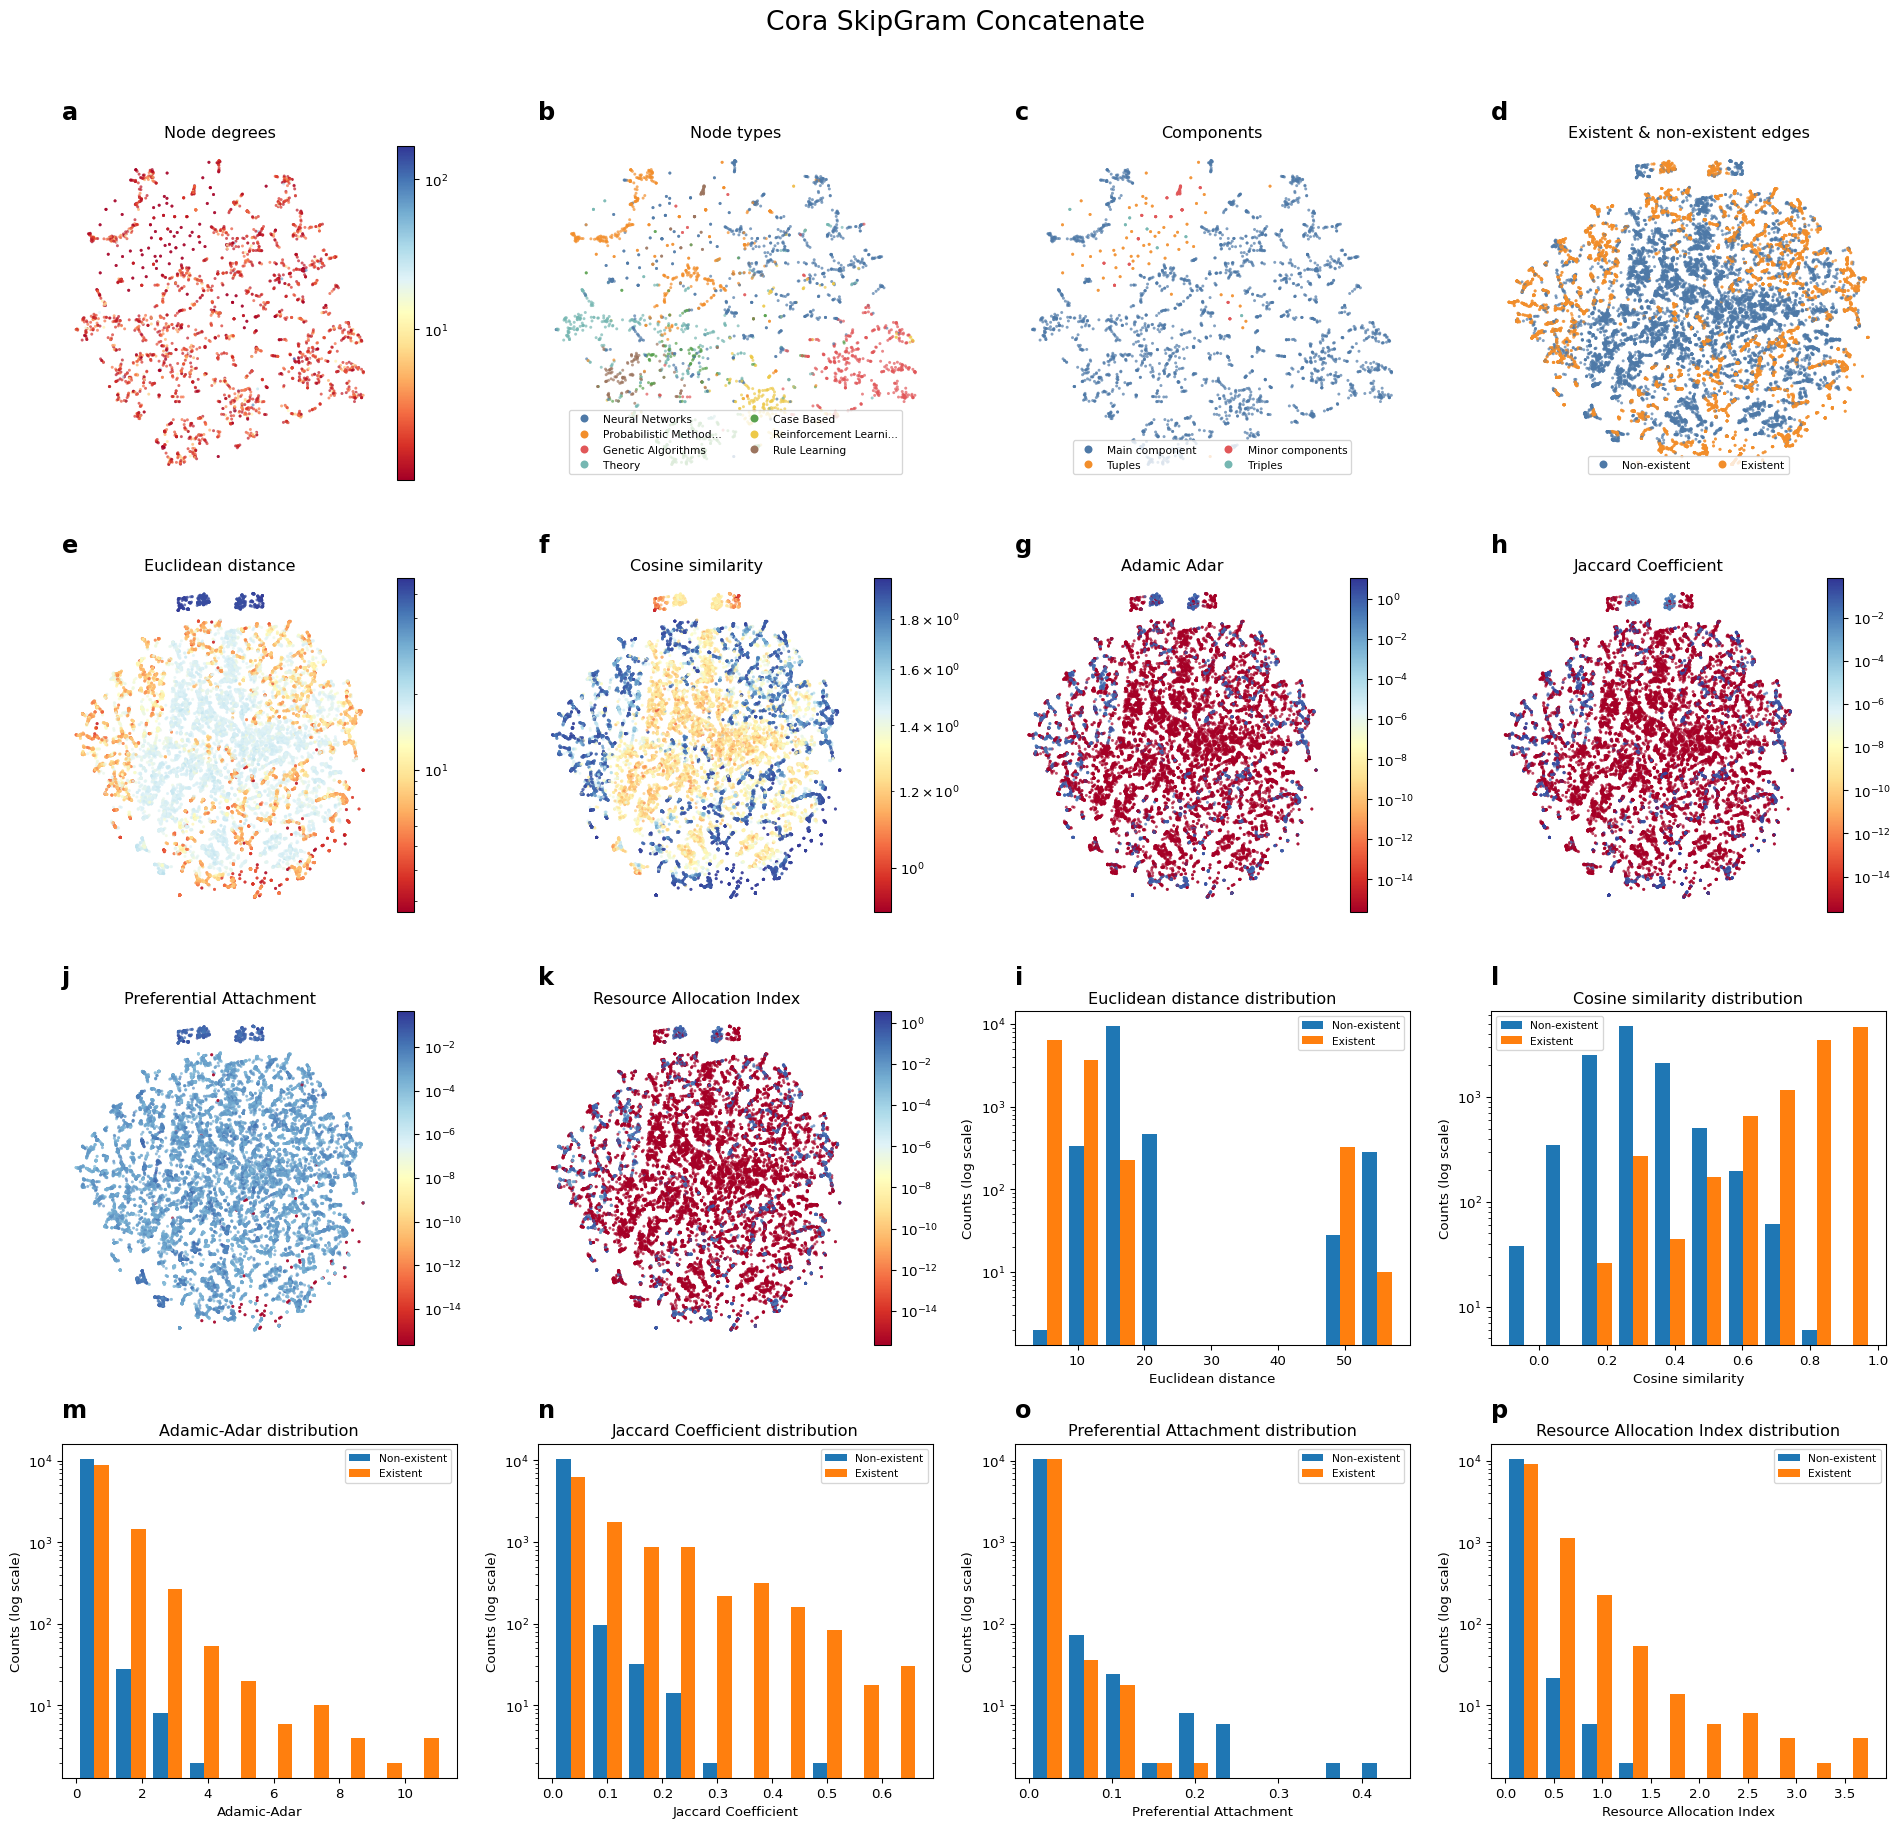

In [27]:
visualizer.fit_and_plot_all(first_embedding)

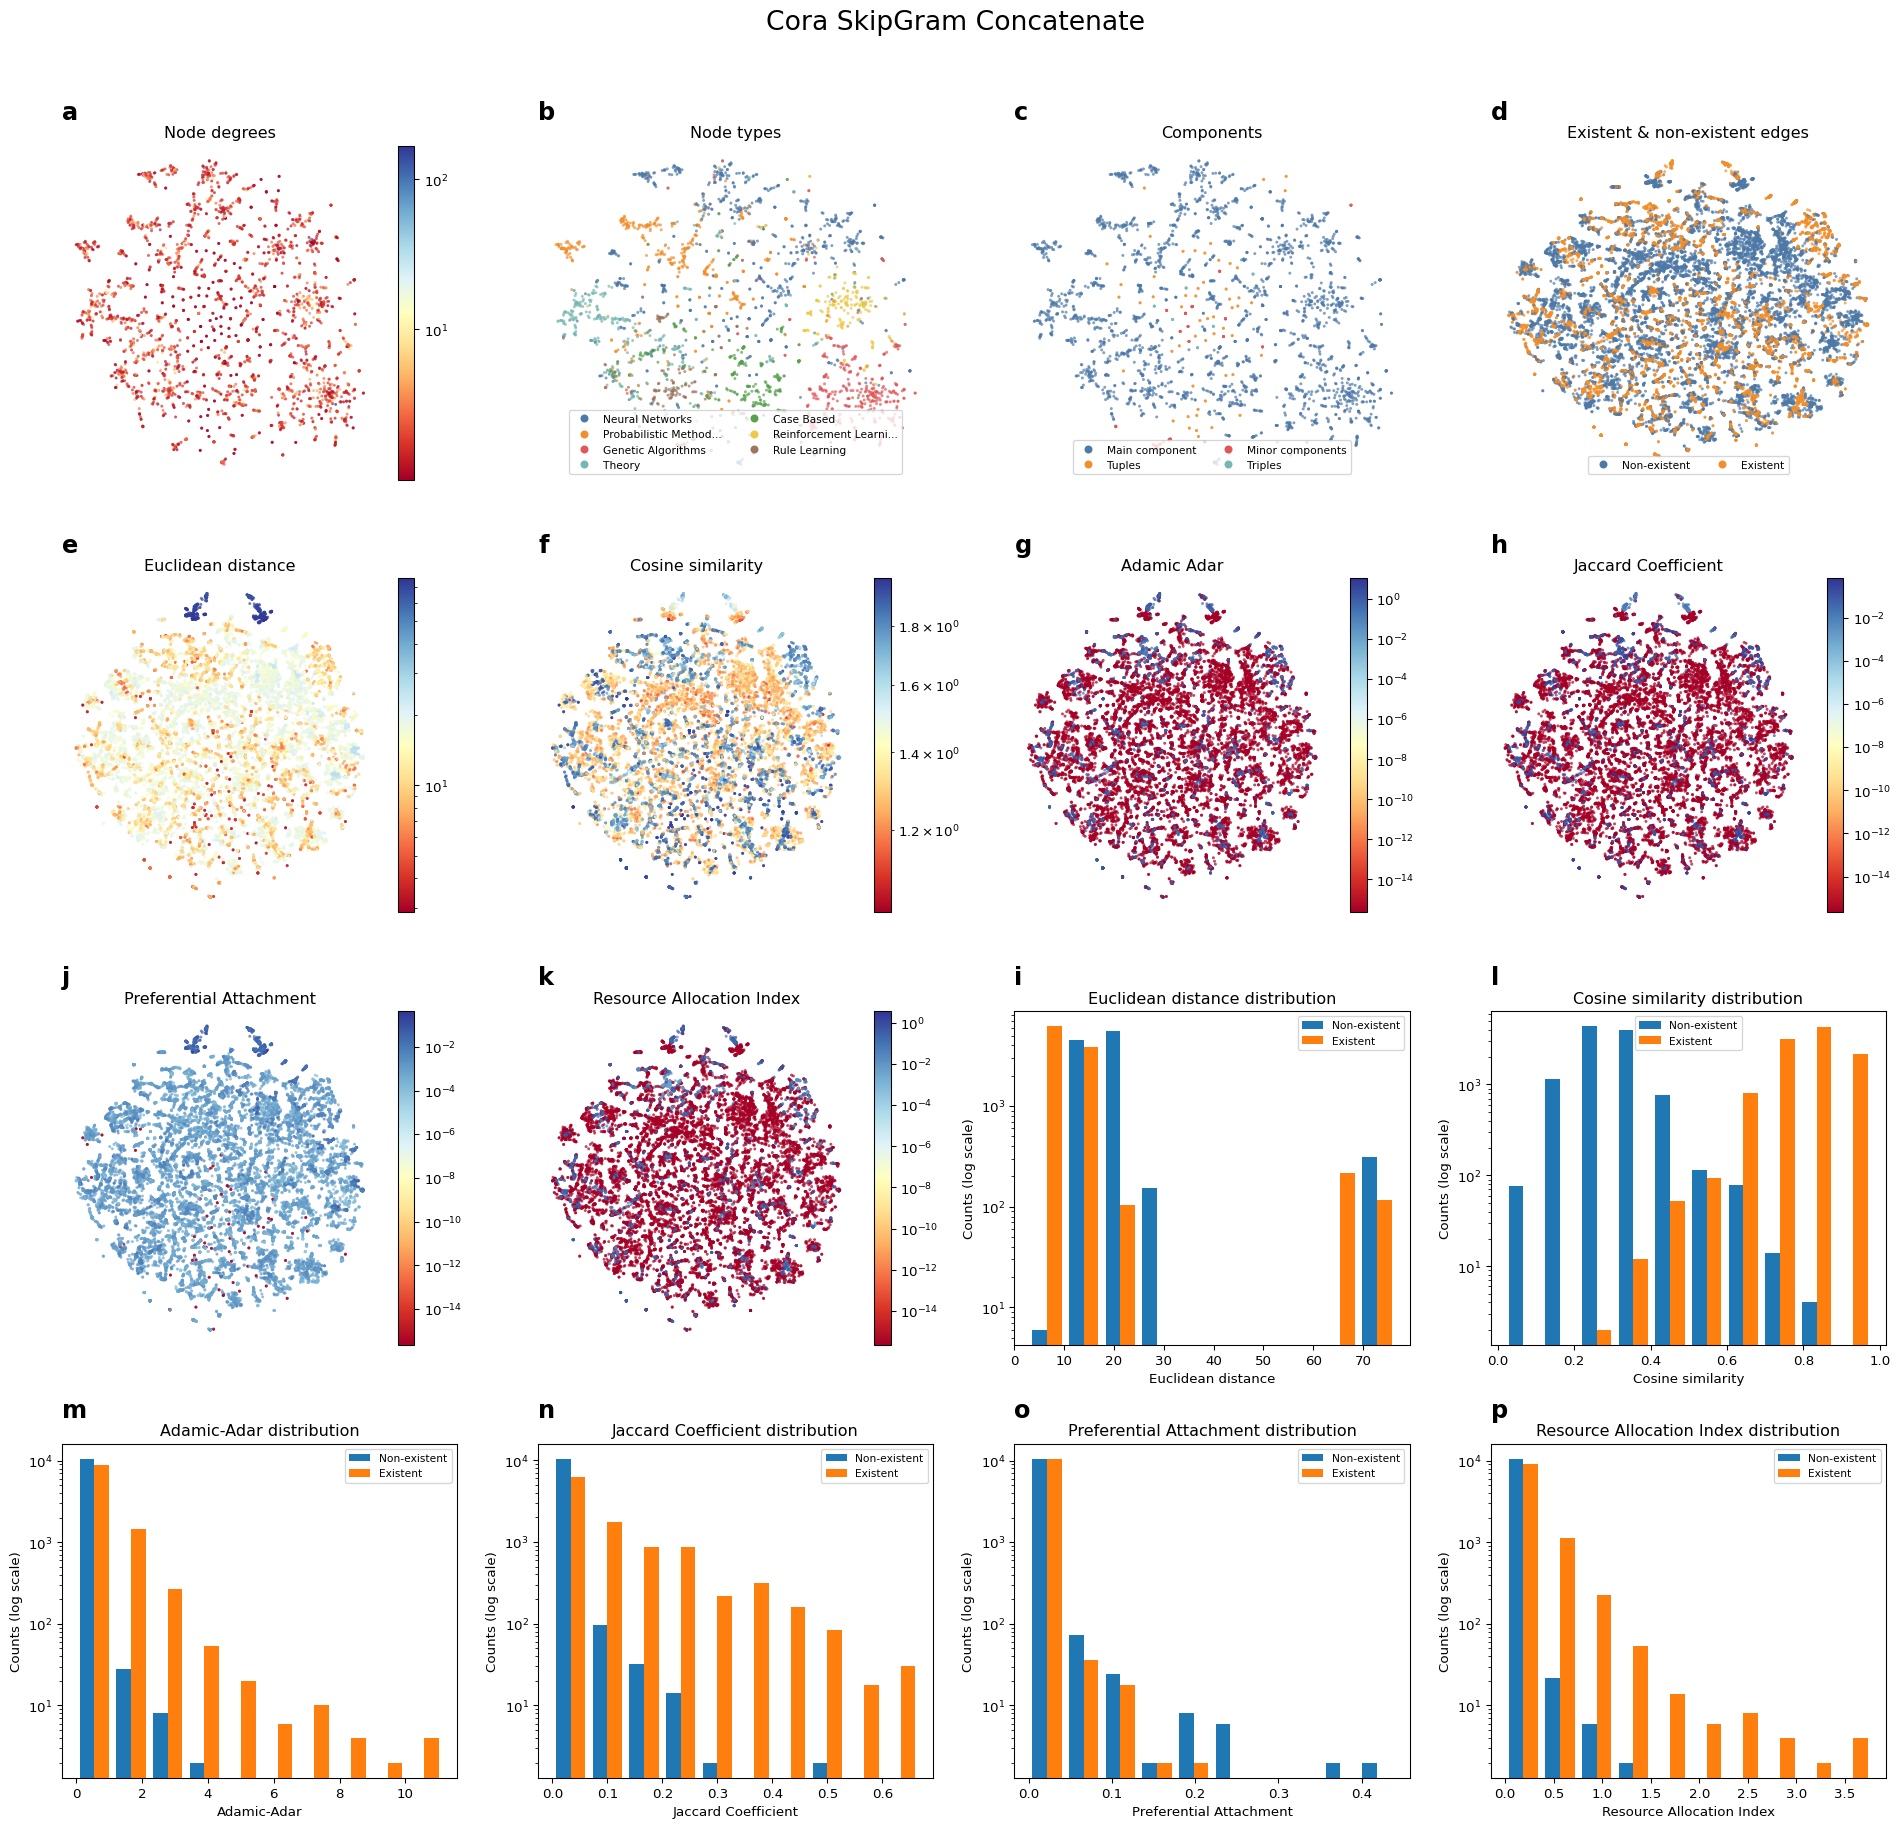

In [28]:
visualizer.fit_and_plot_all(second_embedding)

### Visualizing the node features
Using the same visualization tool, we can also visualize the node features. 

In [30]:
visualizer = GraphVisualizer(
    graph,
    node_embedding_method_name="Words data",
    decomposition_kwargs=dict(metric="cosine")
).fit_and_plot_all(node_features)